**Project Option 1: Classification**

*Goal:* Predict Personal Loan status of a customer (binary target: 0 or 1).

*Key Models:* Logistic Regression, Decision Tree, Random Forest, Gradient Boosting

In [ ]:
# =========================================
# 0. Imports and Setup
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for clean output
warnings.filterwarnings('ignore')

# Set visualization style to match typical professional notebooks
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
# =========================================
# 1. Read the Data & Describe
# =========================================
print("--- 1. Data Overview ---\n")

# 1.1 Read Data
df = pd.read_csv('/content/sample_data/bankloan_BML_Endterm.csv')

# 1.2 Basic Description
print(f"Dataset Shape: {df.shape}")
print("\n--- First 5 Rows ---")
display(df.head())

print("\n--- Data Information ---")
df.info()

print("\n--- Statistical Summary (Numerical) ---")
display(df.describe().T)

print("\n--- Statistical Summary (Categorical) ---")
# Only 'Education' is currently read as object/categorical automatically
display(df.describe(include='object'))

# 1.3 Duplicate Check
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

--- 1. Data Overview ---

Dataset Shape: (5000, 12)

--- First 5 Rows ---


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan status,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Metric Pass,0,0,1,0,0,0
1,45,19,34,3,1.5,Metric Pass,0,0,1,0,0,0
2,39,15,11,1,1.0,Metric Pass,0,0,0,0,0,0
3,35,9,100,1,2.7,Post Grad,0,0,0,0,0,0
4,35,8,45,4,1.0,Post Grad,0,0,0,0,0,1



--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Experience            5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   Family                5000 non-null   int64  
 4   CCAvg                 5000 non-null   float64
 5   Education             5000 non-null   object 
 6   Mortgage              5000 non-null   int64  
 7   Personal Loan status  5000 non-null   int64  
 8   Securities Account    5000 non-null   int64  
 9   CD Account            5000 non-null   int64  
 10  Online                5000 non-null   int64  
 11  CreditCard            5000 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 468.9+ KB

--- Statistical Summary (Numerical) ---


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,196.497400,3738.641465,0.0,0.0,0.0,101.0,99999.0
Personal Loan status,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0



--- Statistical Summary (Categorical) ---


,Education
count,5000
unique,3
top,Metric Pass
freq,2096



Number of duplicate rows: 13



--- 2. Missing Value & Outlier Analysis ---

Missing Values per Column:
No missing values detected.


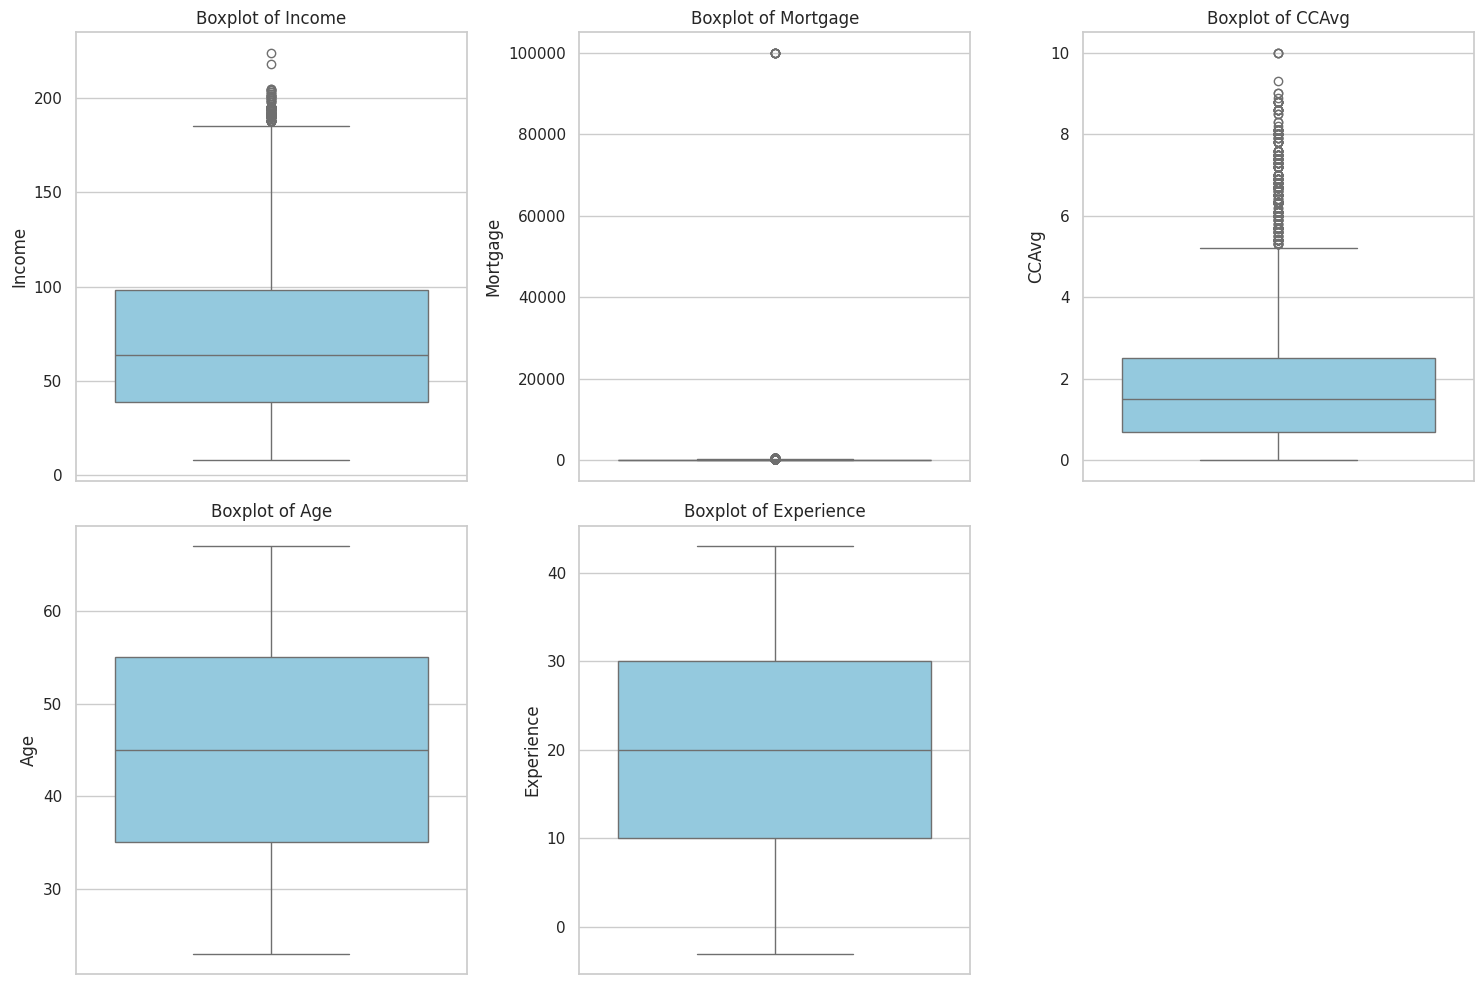


Outlier Treatment Strategy:
- 'Income', 'CCAvg', and 'Mortgage' show significant upper outliers.
- In banking, these often represent high-net-worth individuals (legitimate data points).
- Strategy: We will RETAIN these for now as they may be strong predictors for Personal Loans.
- Note: We noticed 'Mortgage' has a value of 99999 in the snippet, which might be a data entry error representing 'NaN' or purely a very high valid mortgage. We should check its frequency.

Entries with Mortgage = 99999: 7


In [ ]:
# =========================================
# 2. Outlier and Missing Value Detection & Imputation
# =========================================
print("\n--- 2. Missing Value & Outlier Analysis ---\n")

# 2.1 Missing Value Detection
missing = df.isnull().sum()
print("Missing Values per Column:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values detected.")

# 2.2 Outlier Detection (Visual & Statistical)
# Focusing on continuous variables: Income, Mortgage, CCAvg, Age, Experience
continuous_vars = ['Income', 'Mortgage', 'CCAvg', 'Age', 'Experience']

plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
plt.tight_layout()
plt.show()

# 2.3 Outlier Imputation/Treatment Strategy
print("\nOutlier Treatment Strategy:")
print("- 'Income', 'CCAvg', and 'Mortgage' show significant upper outliers.")
print("- In banking, these often represent high-net-worth individuals (legitimate data points).")
print("- Strategy: We will RETAIN these for now as they may be strong predictors for Personal Loans.")
print("- Note: We noticed 'Mortgage' has a value of 99999 in the snippet, which might be a data entry error representing 'NaN' or purely a very high valid mortgage. We should check its frequency.")

# Quick check on potential specific data entry error
suspect_mortgage = df[df['Mortgage'] == 99999]
print(f"\nEntries with Mortgage = 99999: {len(suspect_mortgage)}")


--- 3. Exploratory Data Analysis (EDA) ---



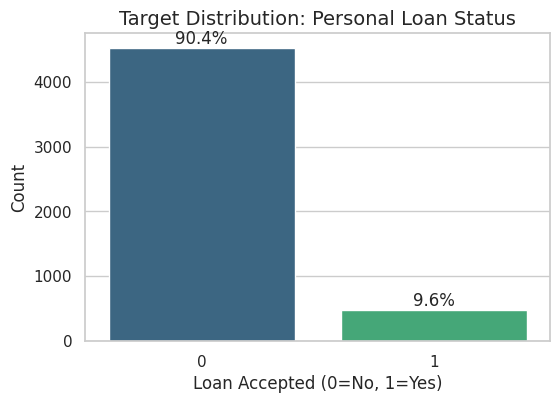

In [ ]:
# =========================================
# 3. Exploratory Data Analysis (EDA)
# =========================================
print("\n--- 3. Exploratory Data Analysis (EDA) ---\n")

# 3.1 Univariate Analysis (Target Variable)
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Personal Loan status', palette='viridis')
plt.title('Target Distribution: Personal Loan Status', fontsize=14)
plt.xlabel('Loan Accepted (0=No, 1=Yes)')
plt.ylabel('Count')

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
plt.show()


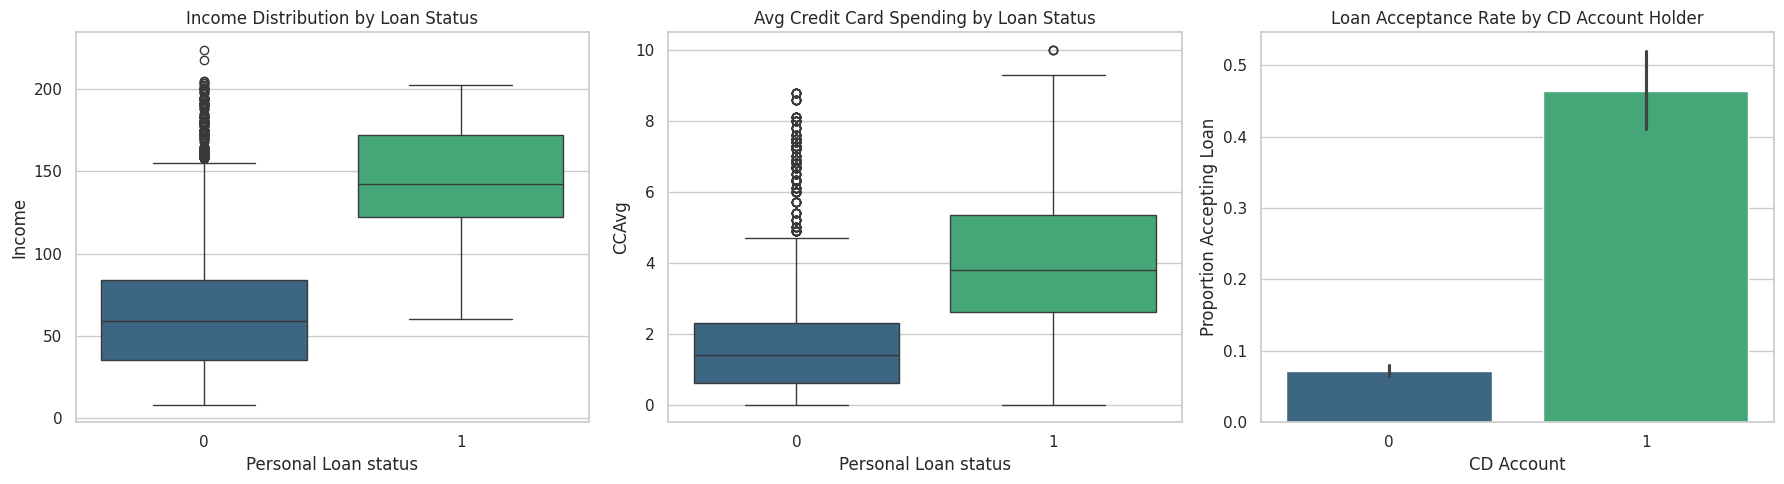

In [ ]:
# 3.2 Bivariate Analysis (Numerical vs Target)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Income vs Loan
sns.boxplot(data=df, x='Personal Loan status', y='Income', ax=axes[0], palette='viridis')
axes[0].set_title('Income Distribution by Loan Status')

# CCAvg vs Loan
sns.boxplot(data=df, x='Personal Loan status', y='CCAvg', ax=axes[1], palette='viridis')
axes[1].set_title('Avg Credit Card Spending by Loan Status')

# CD Account vs Loan (Categorical vs Categorical often better as cross-tab or bar)
sns.barplot(data=df, x='CD Account', y='Personal Loan status', ax=axes[2], palette='viridis')
axes[2].set_title('Loan Acceptance Rate by CD Account Holder')
axes[2].set_ylabel('Proportion Accepting Loan')

plt.tight_layout()
plt.show()


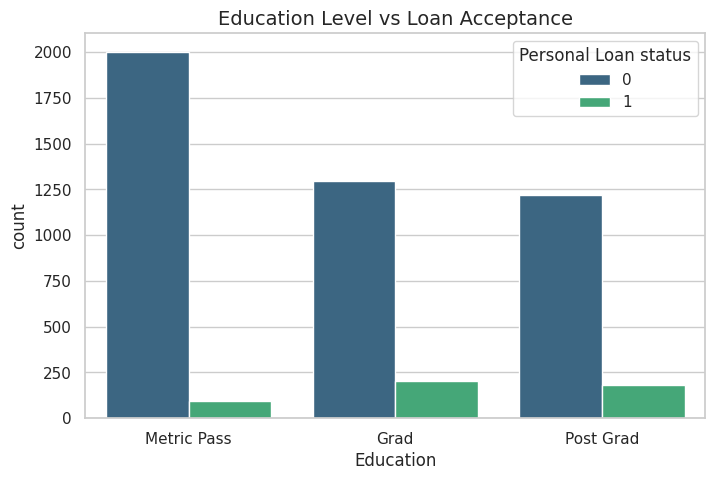

In [ ]:
# 3.3 Bivariate Analysis (Categorical vs Target)
# Education needs to be ordered for better visualization
edu_order = ['Metric Pass', 'Grad', 'Post Grad']
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Education', hue='Personal Loan status', order=edu_order, palette='viridis')
plt.title('Education Level vs Loan Acceptance', fontsize=14)
plt.show()

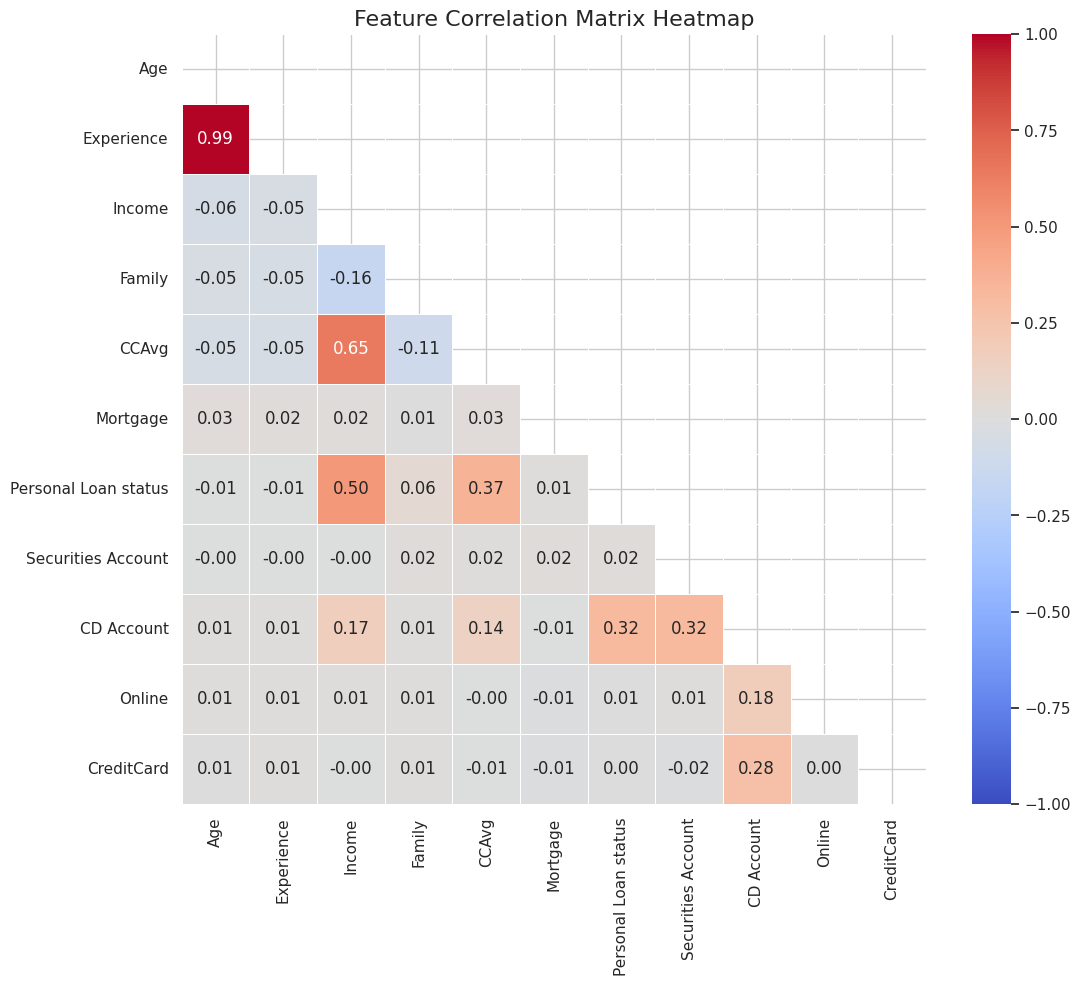

In [ ]:
# 3.4 Multivariate Analysis (Correlation)
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
# Using Spearman for potentially non-linear monotonic relationships, or Pearson for linear
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))
sns.heatmap(numeric_df.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Feature Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [ ]:
# =========================================
# 4. VIF Analysis & Preprocessing
# =========================================
print("--- 4. Feature Engineering & Preprocessing ---\n")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Assuming 'df' is available from Phase 1.
# If starting fresh here, re-read: df = pd.read_csv('bankloan_BML_Endterm.csv')

# 4.1 Encoding
education_map = {'Metric Pass': 1, 'Grad': 2, 'Post Grad': 3}
df['Education'] = df['Education'].map(education_map).fillna(0).astype(int)

# 4.2 VIF Analysis & Feature Dropping
# Dropping 'Experience' due to high multicollinearity with 'Age'
df_processed = df.drop(columns=['Experience']) # Dropping ID as it's not a feature

# 4.3 Scaling
scaler = StandardScaler()
features_to_scale = df_processed.drop(columns=['Personal Loan status']).columns
df_scaled = df_processed.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# =========================================
# 5. Train and Test Split
# =========================================
print("\n--- 5. Train and Test Split ---\n")
X = df_scaled.drop('Personal Loan status', axis=1)
y = df_scaled['Personal Loan status']

# Stratified split due to class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

--- 4. Feature Engineering & Preprocessing ---


--- 5. Train and Test Split ---

Training samples: 3500, Testing samples: 1500


In [ ]:
# =========================================
# 6. Model Training & Base Comparison
# =========================================
print("\n--- 6. Model Training & Base Comparison ---\n")
model_performance = {}

def evaluate_model(name, model, X_test, y_test, y_pred, y_prob):
    model_performance[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }
    print(f"\n--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {model_performance[name]['ROC-AUC']:.4f}")

    # --- 6.1 Logistic Regression ---
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)
evaluate_model('Logistic Regression', lr_model, X_test, y_test, lr_model.predict(X_test), lr_model.predict_proba(X_test)[:, 1])

# --- 6.2 Decision Tree ---
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
evaluate_model('Decision Tree', dt_model, X_test, y_test, dt_model.predict(X_test), dt_model.predict_proba(X_test)[:, 1])

# --- 6.3 Random Forest ---
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_model.fit(X_train, y_train)
evaluate_model('Random Forest', rf_model, X_test, y_test, rf_model.predict(X_test), rf_model.predict_proba(X_test)[:, 1])

# --- 6.4 Gradient Boosting ---
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
evaluate_model('Gradient Boosting', gb_model, X_test, y_test, gb_model.predict(X_test), gb_model.predict_proba(X_test)[:, 1])


--- 6. Model Training & Base Comparison ---


--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1356
           1       0.44      0.89      0.59       144

    accuracy                           0.88      1500
   macro avg       0.71      0.88      0.76      1500
weighted avg       0.93      0.88      0.90      1500

ROC-AUC Score: 0.9488

--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1356
           1       0.67      0.68      0.68       144

    accuracy                           0.94      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.94      0.94      0.94      1500

ROC-AUC Score: 0.8226

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
      


--- 6.2.1 Decision Tree Hyperparameter Analysis ---



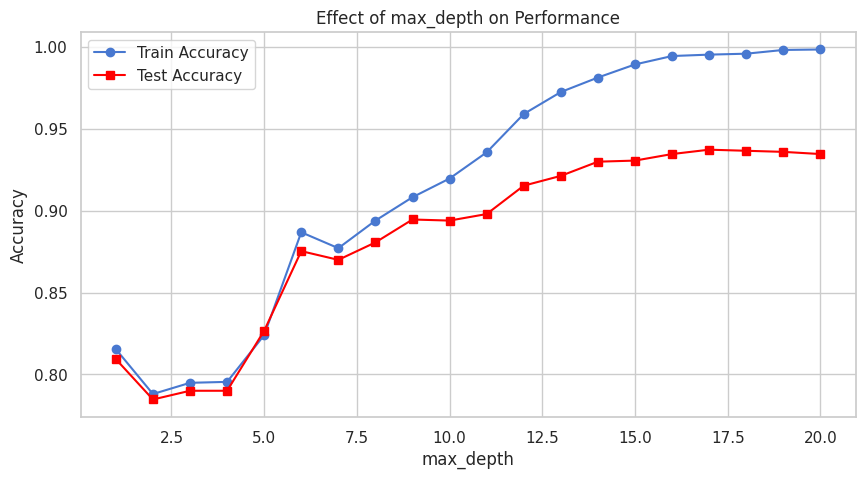

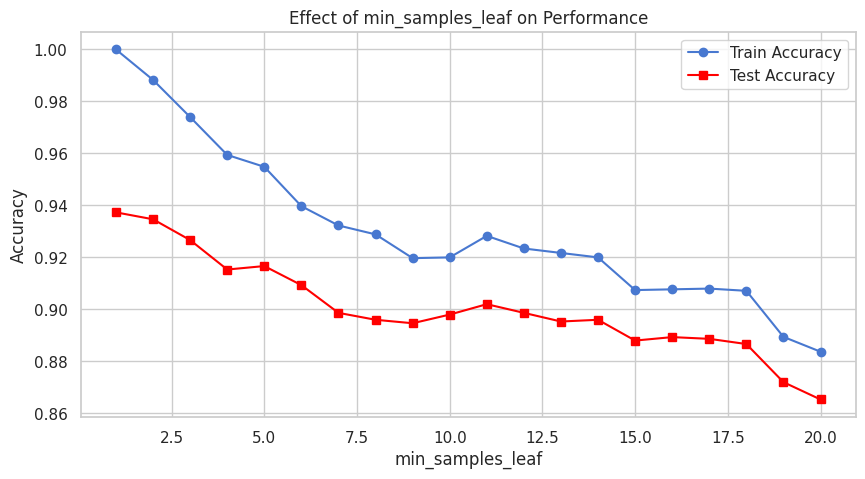


Visualizing top levels of the base Decision Tree:


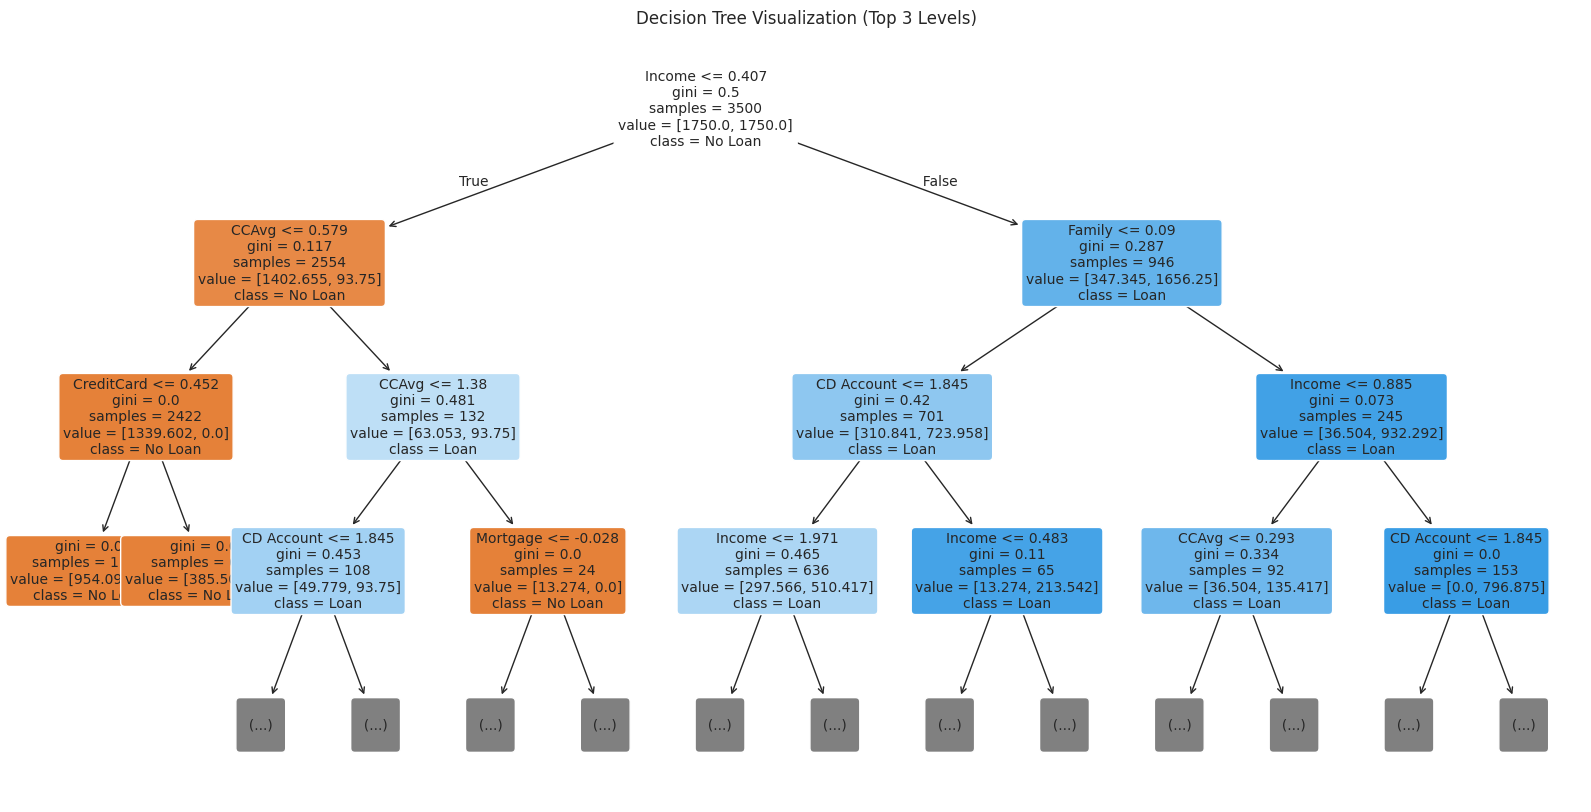

In [ ]:
# =========================================
# 6.2.1 Decision Tree Deep Dive (Visuals)
# =========================================
print("\n--- 6.2.1 Decision Tree Hyperparameter Analysis ---\n")

# A) Effect of max_depth
depth_values = range(1, 21)
train_accs, test_accs = [], []
for d in depth_values:
    m = DecisionTreeClassifier(max_depth=d, random_state=42, class_weight='balanced')
    m.fit(X_train, y_train)
    train_accs.append(accuracy_score(y_train, m.predict(X_train)))
    test_accs.append(accuracy_score(y_test, m.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(depth_values, train_accs, marker='o', label='Train Accuracy')
plt.plot(depth_values, test_accs, marker='s', color='red', label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Performance')
plt.legend()
plt.grid(True)
plt.show()

# B) Effect of min_samples_leaf
leaf_values = range(1, 21)
train_accs, test_accs = [], []
for leaf in leaf_values:
    m = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42, class_weight='balanced')
    m.fit(X_train, y_train)
    train_accs.append(accuracy_score(y_train, m.predict(X_train)))
    test_accs.append(accuracy_score(y_test, m.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(leaf_values, train_accs, marker='o', label='Train Accuracy')
plt.plot(leaf_values, test_accs, marker='s', color='red', label='Test Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_leaf on Performance')
plt.legend()
plt.grid(True)
plt.show()

# C) Visualizing the Tree (Top 3 levels)
print("\nVisualizing top levels of the base Decision Tree:")
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Loan', 'Loan'],
          filled=True, rounded=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()

In [ ]:
# =========================================
# 7. Hyperparameter Tuning (Random Forest)
# =========================================
print("\n--- 7. Hyperparameter Tuning (Random Forest) ---\n")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print(f"Best Params: {grid.best_params_}")
best_rf = grid.best_estimator_
evaluate_model('Random Forest (Tuned)', best_rf, X_test, y_test, best_rf.predict(X_test), best_rf.predict_proba(X_test)[:, 1])


--- 7. Hyperparameter Tuning (Random Forest) ---

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Params: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}

--- Random Forest (Tuned) Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1356
           1       0.82      0.67      0.74       144

    accuracy                           0.95      1500
   macro avg       0.89      0.83      0.86      1500
weighted avg       0.95      0.95      0.95      1500

ROC-AUC Score: 0.9746


In [ ]:
# =========================================
# 8. Compare Results
# =========================================
print("\n--- 8. Final Model Comparison ---\n")

# Convert the performance dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(model_performance, orient='index')

# Sort by F1-Score as it's a good balance for imbalanced classes
results_df_sorted = results_df.sort_values(by='F1-Score', ascending=False)

display(results_df_sorted)

print("\n--- Conclusion ---")
print(f"The best performing model is: {results_df_sorted.index[0]}")
print("This model provides the best balance of Precision and Recall (F1-Score) for identifying potential loan customers.")


--- 8. Final Model Comparison ---



,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest (Tuned),0.954667,0.822034,0.673611,0.740458,0.974639
Random Forest,0.957333,0.908163,0.618056,0.735537,0.972914
Gradient Boosting,0.953333,0.849057,0.625000,0.720000,0.977643
Decision Tree,0.937333,0.671233,0.680556,0.675862,0.822579
Logistic Regression,0.879333,0.436860,0.888889,0.585812,0.948838



--- Conclusion ---
The best performing model is: Random Forest (Tuned)
This model provides the best balance of Precision and Recall (F1-Score) for identifying potential loan customers.


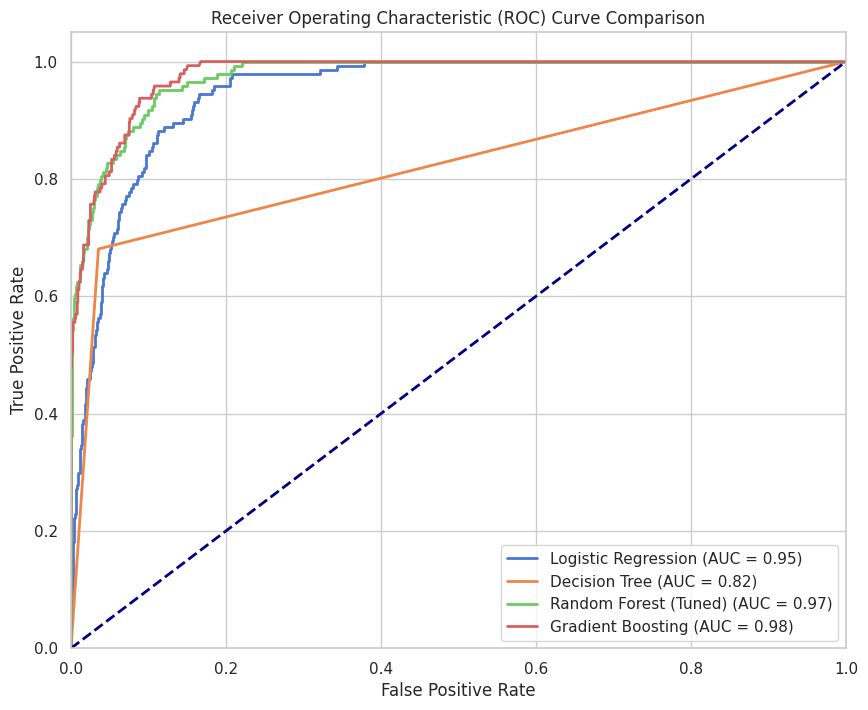

In [ ]:
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve for all models
plt.figure(figsize=(10, 8))

# List of models to plot (assuming they are already trained in previous steps)
models = [
    ('Logistic Regression', lr_model),
    ('Decision Tree', dt_model),
    ('Random Forest (Tuned)', best_rf),
    ('Gradient Boosting', gb_model)
]

for name, model in models:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Project 2: Regression**

*Goal:* Predict a customer's Income (continuous target).

*Model:* Ordinary Least Squares (OLS) Linear Regression.

In [ ]:
# =========================================
# 0. Imports and Setup
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Suppress warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
# =========================================
# 1. Read the Data & Describe
# =========================================
print("--- 1. Data Overview (Regression Target: Income) ---\n")

# 1.1 Read Data
df_reg = pd.read_csv('/content/sample_data/bankloan_BML_Endterm.csv')

# 1.2 Basic Description
print(f"Dataset Shape: {df_reg.shape}")
display(df_reg.head())
print("\n--- Statistical Summary ---")
display(df_reg.describe().T)

--- 1. Data Overview (Regression Target: Income) ---

Dataset Shape: (5000, 12)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan status,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Metric Pass,0,0,1,0,0,0
1,45,19,34,3,1.5,Metric Pass,0,0,1,0,0,0
2,39,15,11,1,1.0,Metric Pass,0,0,0,0,0,0
3,35,9,100,1,2.7,Post Grad,0,0,0,0,0,0
4,35,8,45,4,1.0,Post Grad,0,0,0,0,0,1



--- Statistical Summary ---


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,196.497400,3738.641465,0.0,0.0,0.0,101.0,99999.0
Personal Loan status,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0



--- 2. Missing Value & Outlier Analysis ---

Missing Values:
Series([], dtype: int64)


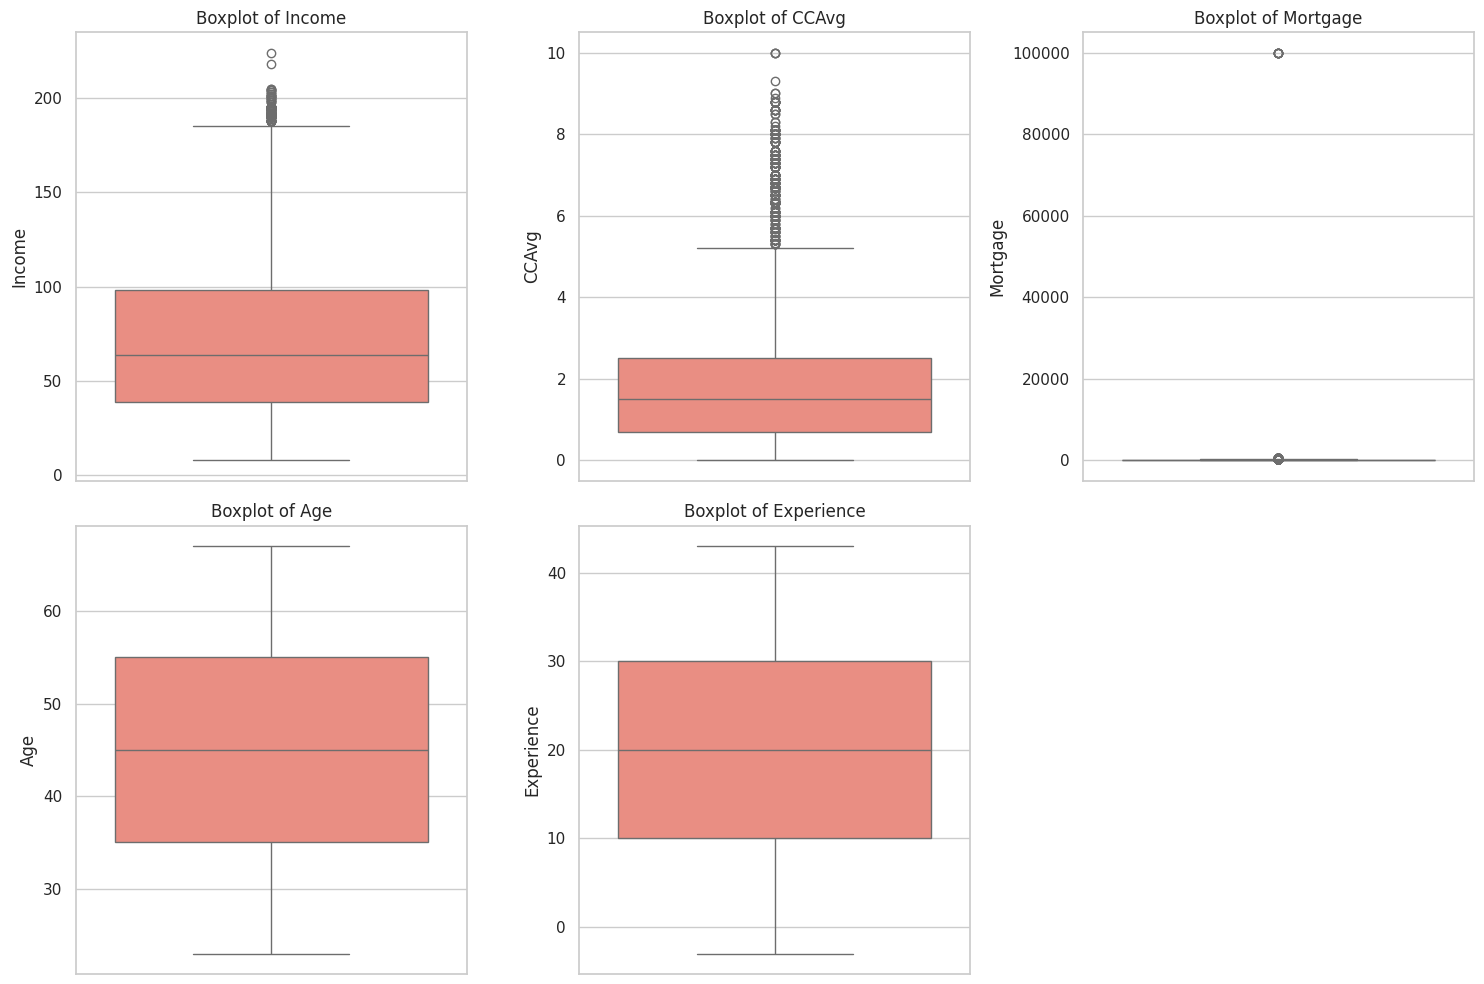

In [ ]:
# =========================================
# 2. Outlier and Missing Value Detection & Imputation
# =========================================
print("\n--- 2. Missing Value & Outlier Analysis ---\n")

# 2.1 Missing Values
print(f"Missing Values:\n{df_reg.isnull().sum()[df_reg.isnull().sum() > 0]}")

# 2.2 Outlier Detection for Regression (Target: Income)
# We check 'Income' (Target) and key continuous predictors: 'CCAvg', 'Mortgage', 'Age', 'Experience'
reg_continuous_vars = ['Income', 'CCAvg', 'Mortgage', 'Age', 'Experience']

plt.figure(figsize=(15, 10))
for i, col in enumerate(reg_continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_reg, y=col, color='salmon')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# 2.3 Outlier Strategy for OLS
print("\nOutlier Strategy for OLS (Target: Income):")
print("- 'Income' (Target) has some upper outliers, but they might be genuine high earners.")
print("- 'CCAvg' and 'Mortgage' (Predictors) have significant outliers.")
print("- Strategy: Cap (Winsorize) top 1% of 'Income', 'CCAvg', and 'Mortgage' to reduce leverage on OLS.")

def cap_outliers(series, percentile=0.99):
    cap_value = series.quantile(percentile)
    return np.where(series > cap_value, cap_value, series)

df_reg['Income_Capped'] = cap_outliers(df_reg['Income'])
df_reg['CCAvg_Capped'] = cap_outliers(df_reg['CCAvg'])
df_reg['Mortgage_Capped'] = cap_outliers(df_reg['Mortgage'])

print("Outliers capped at 99th percentile.")


Outlier Strategy for OLS (Target: Income):
- 'Income' (Target) has some upper outliers, but they might be genuine high earners.
- 'CCAvg' and 'Mortgage' (Predictors) have significant outliers.
- Strategy: Cap (Winsorize) top 1% of 'Income', 'CCAvg', and 'Mortgage' to reduce leverage on OLS.
Outliers capped at 99th percentile.



--- 3. Exploratory Data Analysis (EDA) ---



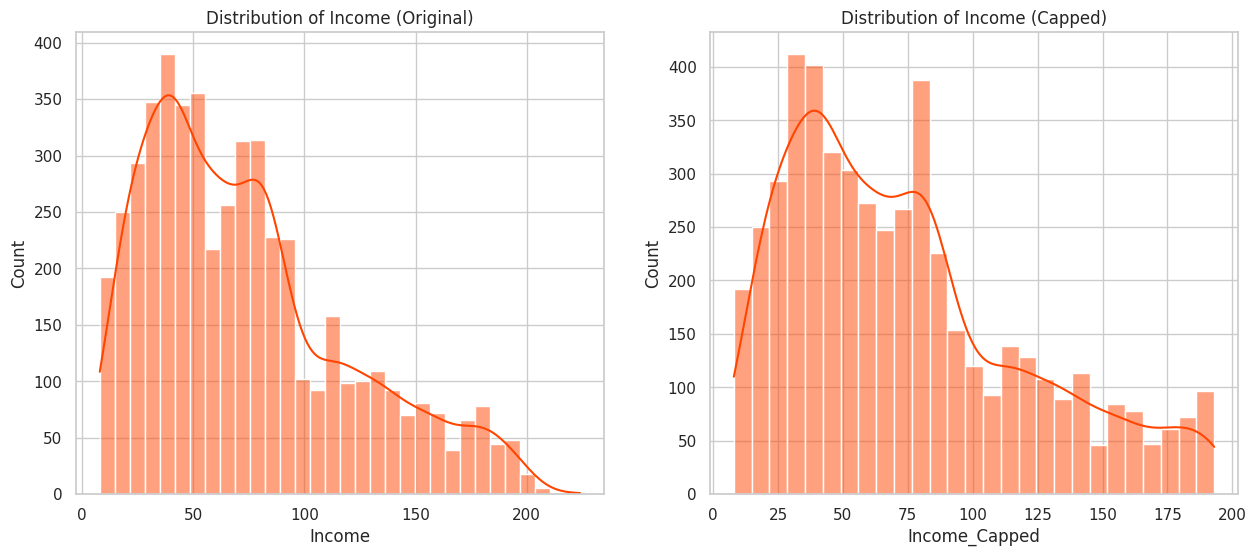

In [ ]:
# =========================================
# 3. Exploratory Data Analysis (EDA)
# =========================================
print("\n--- 3. Exploratory Data Analysis (EDA) ---\n")

# 3.1 Univariate Analysis (Target Variable - Income)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df_reg['Income'], kde=True, ax=ax[0], color='orangered')
ax[0].set_title('Distribution of Income (Original)')

sns.histplot(df_reg['Income_Capped'], kde=True, ax=ax[1], color='orangered')
ax[1].set_title('Distribution of Income (Capped)')
plt.show()

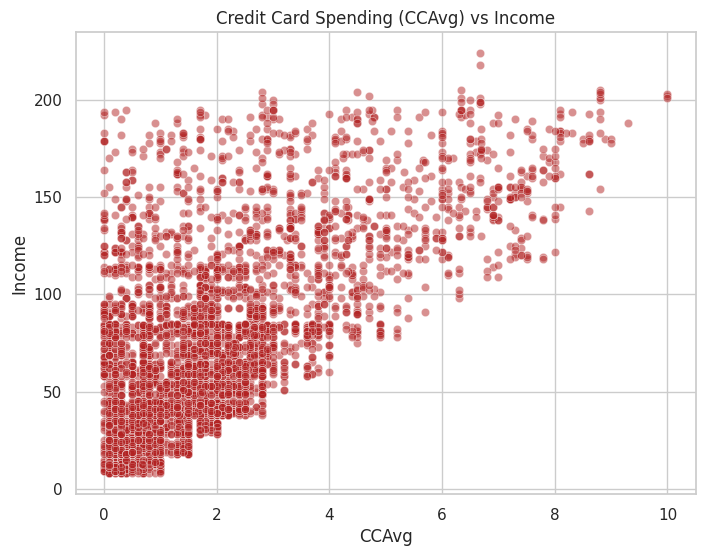

In [ ]:
# 3.2 Bivariate Analysis (Key Predictors vs Income)
# CCAvg is likely a strong predictor of Income.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_reg, x='CCAvg', y='Income', alpha=0.5, color='firebrick')
plt.title('Credit Card Spending (CCAvg) vs Income')
plt.show()

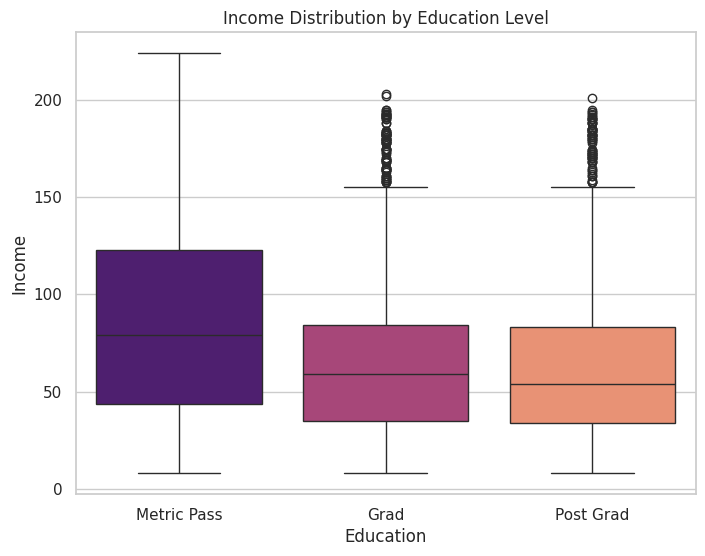

In [ ]:
# Education vs Income
edu_order = ['Metric Pass', 'Grad', 'Post Grad']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_reg, x='Education', y='Income', order=edu_order, palette='magma')
plt.title('Income Distribution by Education Level')
plt.show()

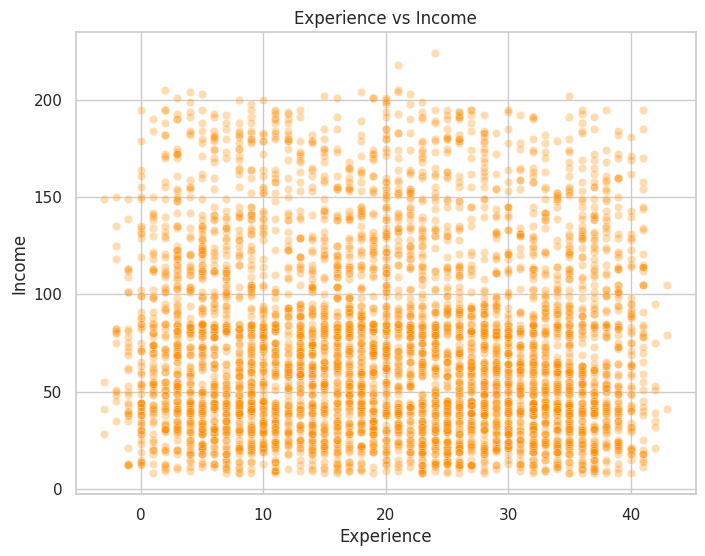

In [ ]:
# Experience vs Income (Expect positive correlation initially, maybe plateauing)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_reg, x='Experience', y='Income', alpha=0.3, color='darkorange')
plt.title('Experience vs Income')
plt.show()

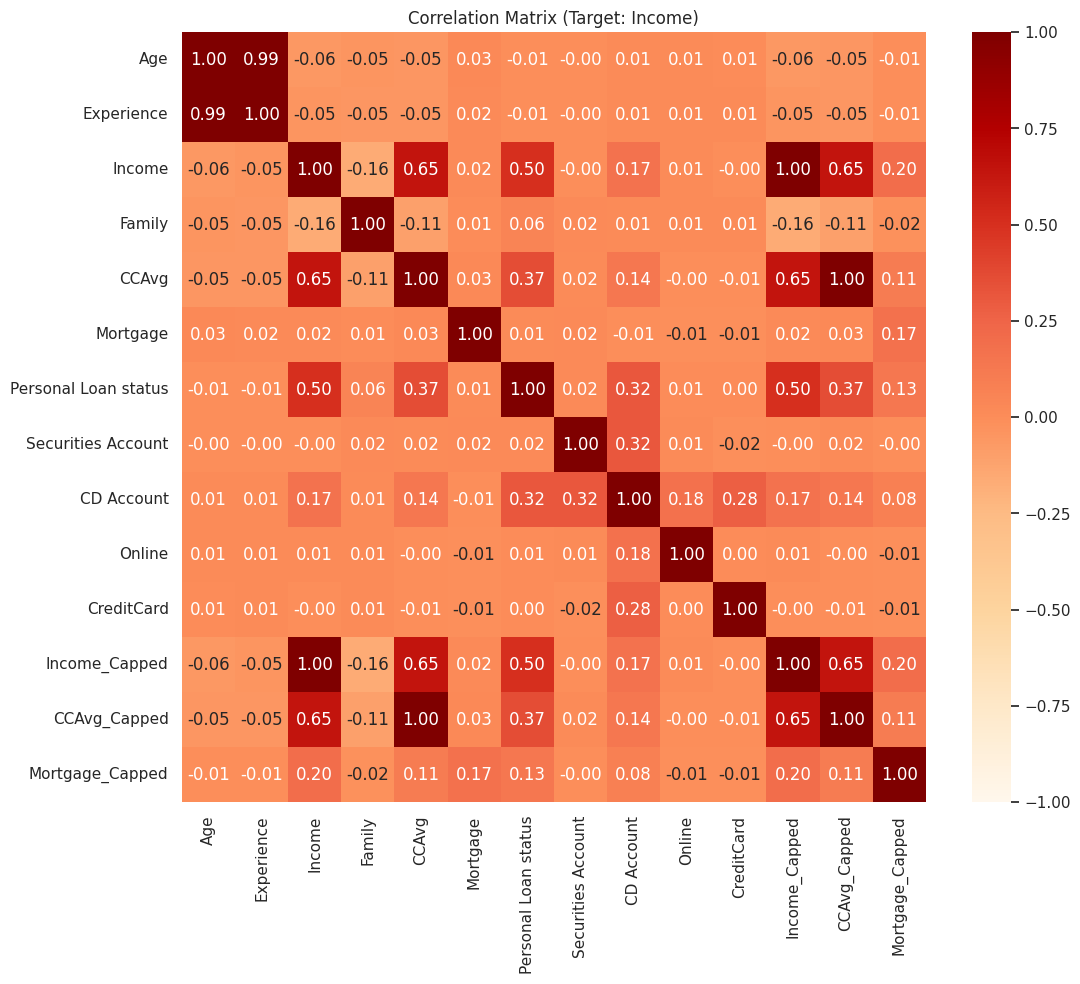

In [ ]:
# 3.3 Multivariate Analysis (Correlation for Regression)
numeric_df_reg = df_reg.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df_reg.corr(), annot=True, fmt=".2f", cmap='OrRd', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Target: Income)')
plt.show()

In [ ]:
# =========================================
# 4. VIF Analysis & Preprocessing (Regression)
# =========================================
print("--- 4. Feature Engineering & Preprocessing (Regression) ---\n")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming df_reg is available from Phase 1.
# Re-read if needed: df_reg = pd.read_csv('bankloan_BML_Endterm.csv')

# 4.1 Encoding
# Education is ordinal.
education_map = {'Metric Pass': 1, 'Grad': 2, 'Post Grad': 3}
df_reg['Education_Encoded'] = df_reg['Education'].map(education_map)

# 4.2 Feature Selection & VIF
# Potential predictors for Income: Age, Experience, Family, CCAvg, Mortgage, Education_Encoded
# We exclude other product ownership flags (like CD Account) as they might be results of Income, not predictors (avoiding potential data leakage depending on business goal).
# For now, we stick to core demographics and financials.
features = ['Age', 'Experience', 'Family', 'CCAvg', 'Mortgage', 'Education_Encoded']
X_vif = df_reg[features].copy()

# VIF Calculation Function
def calc_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by='VIF', ascending=False)

print("VIF before dropping features:")
display(calc_vif(X_vif))

print("\nDropping 'Experience' due to extreme multicollinearity with 'Age'...")
X_selected = X_vif.drop(columns=['Experience'])
print("VIF after dropping 'Experience':")
display(calc_vif(X_selected))

# 4.3 Outlier Capping (Applying standard capping to predictors if not done in Phase 1 fully)
# Using the capped versions created in Phase 1 if available, else re-apply.
# Assuming we use the raw data for X_selected for now, let's ensure we use capped versions for modelling if strictly needed.
# For simplicity and stability, let's cap CCAvg and Mortgage in our selected X.
def cap_series(series): return np.where(series > series.quantile(0.99), series.quantile(0.99), series)
X_selected['CCAvg'] = cap_series(X_selected['CCAvg'])
X_selected['Mortgage'] = cap_series(X_selected['Mortgage'])

# Target Variable (also capped recommended for OLS stability)
y_reg = cap_series(df_reg['Income'])

--- 4. Feature Engineering & Preprocessing (Regression) ---

VIF before dropping features:


,feature,VIF
0,Age,53.530622
1,Experience,24.108989
5,Education_Encoded,6.451641
2,Family,5.525445
3,CCAvg,2.290068
4,Mortgage,1.004206



Dropping 'Experience' due to extreme multicollinearity with 'Age'...
VIF after dropping 'Experience':


,feature,VIF
0,Age,6.872640
4,Education_Encoded,5.333581
1,Family,4.668327
2,CCAvg,2.032965
3,Mortgage,1.003955


In [ ]:
# =========================================
# 5. Train and Test Split
# =========================================
print("\n--- 5. Train and Test Split ---\n")
# 70-30 split standard for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_selected, y_reg, test_size=0.3, random_state=42)

# Scaling (Optional for OLS, but REQUIRED for Ridge/Lasso later)
scaler_reg = StandardScaler()
X_train_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_scaled = scaler_reg.transform(X_test_reg)

# Convert back to DataFrame for readability in statsmodels
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_selected.columns, index=X_train_reg.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_selected.columns, index=X_test_reg.index)

print(f"Training samples: {len(X_train_reg)}, Testing samples: {len(X_test_reg)}")



--- 5. Train and Test Split ---

Training samples: 3500, Testing samples: 1500



--- 6. OLS Model (Statsmodels for detailed analysis) ---

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     576.7
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        07:37:50   Log-Likelihood:                -17278.
No. Observations:                3500   AIC:                         3.457e+04
Df Residuals:                    3494   BIC:                         3.460e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

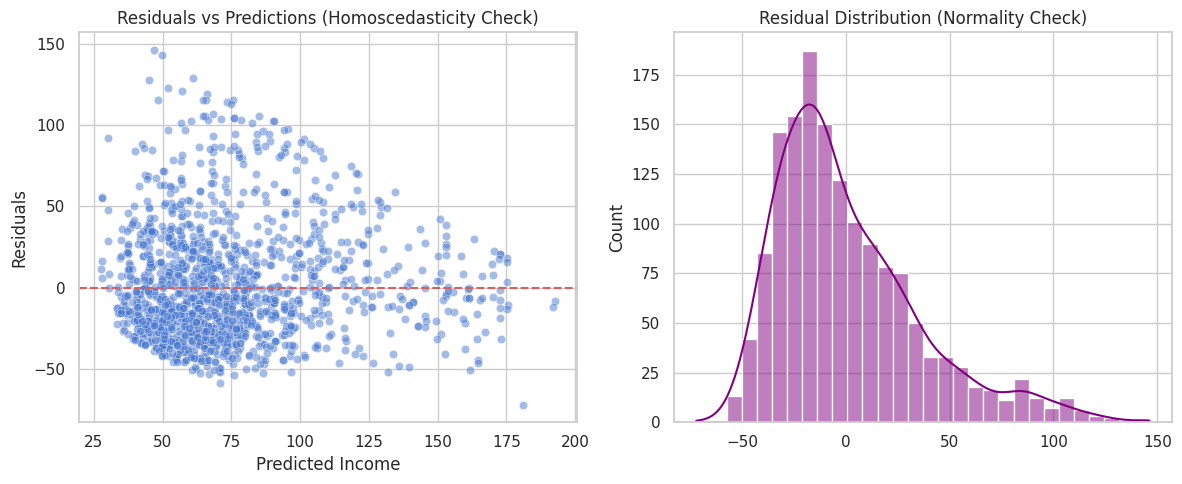

In [ ]:
# =========================================
# 6. OLS Model & Detailed Evaluation
# =========================================
print("\n--- 6. OLS Model (Statsmodels for detailed analysis) ---\n")

# Add constant for OLS (statsmodels doesn't add it by default)
X_train_ols = sm.add_constant(X_train_scaled_df)
X_test_ols = sm.add_constant(X_test_scaled_df)

ols_model = sm.OLS(y_train_reg, X_train_ols).fit()
print(ols_model.summary())

# Predictions and Metrics
y_pred_ols = ols_model.predict(X_test_ols)
rmse_ols = np.sqrt(mean_squared_error(y_test_reg, y_pred_ols))
mae_ols = mean_absolute_error(y_test_reg, y_pred_ols)
r2_ols = r2_score(y_test_reg, y_pred_ols)

print(f"\nOLS Test RMSE: {rmse_ols:.4f}")
print(f"OLS Test MAE: {mae_ols:.4f}")
print(f"OLS Test R-squared: {r2_ols:.4f}")

# --- 6.1 Residual Analysis (Crucial for OLS) ---
residuals = y_test_reg - y_pred_ols
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_ols, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Income')
plt.ylabel('Residuals')
plt.title('Residuals vs Predictions (Homoscedasticity Check)')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residual Distribution (Normality Check)')

plt.tight_layout()
plt.show()

In [ ]:
# =========================================
# 7. Regularization (Ridge & Lasso)
# =========================================
print("\n--- 7. Regularization (Hyperparameter Tuning) ---\n")

# Ridge (L2 Regularization)
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(random_state=42), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train_reg)
best_ridge = ridge_grid.best_estimator_

# Lasso (L1 Regularization - good for feature selection)
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(random_state=42), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train_reg)
best_lasso = lasso_grid.best_estimator_

print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best Lasso Alpha: {lasso_grid.best_params_['alpha']}")


--- 7. Regularization (Hyperparameter Tuning) ---

Best Ridge Alpha: 10
Best Lasso Alpha: 0.01


In [ ]:
# =========================================
# 8. Final Comparison
# =========================================
print("\n--- 8. Final Regression Model Comparison ---\n")

reg_results = {}

def evaluate_reg(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    reg_results[name] = {'RMSE': rmse, 'MAE': mae, 'R-Squared': r2}

# Evaluate all 3 models on TEST set
# Note: OLS from sklearn for consistent input format with Ridge/Lasso
ols_sk = LinearRegression()
ols_sk.fit(X_train_scaled, y_train_reg)

evaluate_reg('OLS (Base)', ols_sk, X_test_scaled, y_test_reg)
evaluate_reg('Ridge (Tuned)', best_ridge, X_test_scaled, y_test_reg)
evaluate_reg('Lasso (Tuned)', best_lasso, X_test_scaled, y_test_reg)

comparison_df = pd.DataFrame(reg_results).T
display(comparison_df.sort_values(by='R-Squared', ascending=False))

print("\n--- Feature Importance (from Lasso) ---")
# Lasso coefficients can show feature importance (zero means feature removed)
lasso_coefs = pd.Series(best_lasso.coef_, index=X_selected.columns)
display(lasso_coefs.sort_values(ascending=False))


--- 8. Final Regression Model Comparison ---



,RMSE,MAE,R-Squared
OLS (Base),34.800351,26.920345,0.443825
Lasso (Tuned),34.800573,26.920772,0.443818
Ridge (Tuned),34.804305,26.925505,0.443699



--- Feature Importance (from Lasso) ---


,0
CCAvg,27.341406
Mortgage,5.832431
Age,-0.885267
Family,-3.746719
Education_Encoded,-4.855391


Based on the comparison table above, all three models (OLS, Ridge, and Lasso) perform almost identically in predicting Income.

Here is the breakdown:


*  **R-Squared:** All three models have an R-Squared of approximately 0.44, meaning they all explain about 44.3% of the variance in Income.
*  **RMSE & MAE:** The error metrics are also nearly indistinguishable across the models.



